# Reprocessing RegSeq Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import sys
sys.path.insert(0, '/home/tom/mpathic')


In [3]:
from mpathic import learn_model

First we import a test data set.

## Compare mapping datasets RegSeq

### rspA

In [4]:
# import data from github
df_git_map = pd.read_csv("data_files/rspAgooddataset_nslater_with_large", delim_whitespace=True)

# compute number of mutations
df_git_map.nmut = 160 - df_git_map.nmut
df_git_map.sort_values("ct", inplace=True, ascending=False)
df_git_map.reset_index(inplace=True, drop=True)

print("Identified barcode/promoter pairs: {}".format(len(df_git_map)))

display(df_git_map.head())
display(df_git_map.tail())

Identified barcode/promoter pairs: 12668


,tag,seq,ct,gene,nmut
0,CTCAGTCCGTAAGTAGTACG,GACAATAAGTGTTCTATTTCCTCTTTTGTCAACCATTCGCAGCGCA...,143.0,rspA,14
1,TGGGCGATCACCGGTATGCC,GACAAAAGGTATTCTCTTTCGTCTTTTGTCATCCATTCACAGCTGA...,112.0,rspA,16
2,AGAGTGGGTTCTGGGCTTAA,TACAAAACGTATTCTATTTCATCTTTGGTGAACCATTCACAGCGCA...,106.0,rspA,17
3,ATGGCATGCACGCCAGAACG,AACAAACGGTATACTATTTCATCTTTTGTCAACCAATCACAGCGGA...,96.0,rspA,17
4,CTTCGACTGACCTTTGGGCG,GACATAAGGTAGTCTATGTGATCTTTATTCAACTATTCAAAGGGCA...,87.0,rspA,18


,tag,seq,ct,gene,nmut
12663,GGACAAGGTTAGGGTAATGC,GACAGAAGTTATTCTATTTCATCTTTTGTCAACCATTCTCAGCCCA...,0.901961,rspA,15
12664,GAGAGCGGATCAATCGCATT,GACAAAAGCTATCCTATTTCATCTATTGTCAAACATGCACAGTGCA...,0.901961,rspA,22
12665,TTAAGCGAACAGGGACGACG,GCCAAAAGGTATTGTATTCCATTTTTTGTCATCCATTGACAGCGCA...,0.901639,rspA,15
12666,AATCGTTTTGCGGGATGCCA,GACAAAAGGTTTTCTATTTCACCTTTTGTCAACCATTCAGAGCGGA...,0.901235,rspA,15
12667,TGACCTGAACCATGCAATAG,GTCAAAAGGTATTCTATTTCATCATTTGTCAACCATTGACAGCGCA...,0.901099,rspA,16


In [5]:
np.sum(df_git_map.ct)

128565.49229

Why are the high counts integers and the low counts are non-integers? Was there some rounding? I guess those are discarded anyways?

In [6]:
# Data from new processing
df = pd.read_csv("../../../data/mapping_sequences/113_mapping_identified.csv", delim_whitespace=True)
display(df.head(5))

,barcode,promoter,count,name,nmut
0,TCTTCGGTGTGCGCTTGAGG,TCTCGCATAAGCACCTTATGCCCGATGATATTTCTTTCATCGGGCT...,1588,poxB,13
1,TTTGGCGACTGTTCGACTGC,GACACAAGGTCTTCTATTTCGGCTTTTGTCAACCATTCACAGCGCA...,797,rspA,17
2,ATTTTAAGGTCTGGCATTGA,ATTGCGCTTCTCGCCCAGAATTTAGACGAAAATTGCCCGGGAATTG...,778,tig,19
3,GTCCTGTCGGCCTGGCGGTT,TCTCGCATAATCGCCTTATCCCCGATGATATTACTTTCATCGGGCT...,761,poxB,14
4,AGCAGAGGCCGCTGCGTGGT,GACAAAAGGTATTCTATTTCAACTTTTGTCAACCATTCACAACGCA...,619,rspA,12


In [7]:
df.rename(columns={"barcode": "tag", "promoter": "seq", "count": "ct"}, inplace=True)

In [8]:
# Filter out single counts
df = df.loc[df['ct'] > 1, :]
df = df.loc[df['nmut'] < 30, :]
df = df.loc[df['ct'] < 200, :]
# Find sequences for gene of interest
df_rspA_new = df.loc[df["name"] == "rspA", :]

# Reset index
df_rspA_new.reset_index(inplace=True, drop=True)

# Print results
print("Identified barcode/promoter pairs: {}".format(len(df_rspA_new)))
df_rspA_new.head()

Identified barcode/promoter pairs: 24251


,tag,seq,ct,name,nmut
0,CCCACGCTACTTAAGTCCGG,GACAAGAGGTATTCTATTTCATCTTTTGTCAACCATTCACAGCGCA...,199,rspA,15
1,GCCTGAGTTATTAGTTTTGG,GACAAAAGGTATTGTATTTCATGTTTTGTCAACCATTCTCAGCGCA...,199,rspA,18
2,GTGTCCCATAGCATCGCCGT,GACAAAAGGTATGCTATTGCATCTTTTGTCACCCATTCACAGCGCA...,196,rspA,19
3,CTTATTATGTAGAATAGCGA,GACAAAAGGGATTCTATTTCATCTGTTGTCAACCATTCTCAGCGCA...,195,rspA,15
4,AGACGTTTTTGCGTACATCC,GACAATATGTATTCTACTTCATCTTTCCGCAACCATTCACAGCGCA...,192,rspA,17


In [9]:
is_un = [1==np.sum(np.equal(df_rspA_new.tag[i], df_rspA_new.tag)) for i in np.arange(len(df_rspA_new))]

In [10]:
df_rspA_new = df_rspA_new.loc[is_un, :]

In [11]:
len(np.unique(df_rspA_new.tag)) == len(df_rspA_new.tag)

True

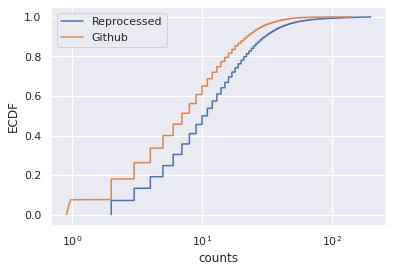

In [12]:
fig, ax = plt.subplots()
ax.plot(np.sort(df_rspA_new['ct']), np.linspace(1/len(df_rspA_new), 1, num=len(df_rspA_new)), label="Reprocessed")
ax.plot(np.sort(df_git_map.ct), np.linspace(1/len(df_git_map), 1, num=len(df_git_map)), label="Github")
#ax.plot(np.sort(df_rspA_new['ct'])/2, np.linspace(1/len(df_rspA_new), 1, num=len(df_rspA_new)), label="Reprocessed, rescaled counts")

ax.set_xlabel("counts")
ax.set_ylabel("ECDF")
ax.set_xscale("log")
ax.legend();

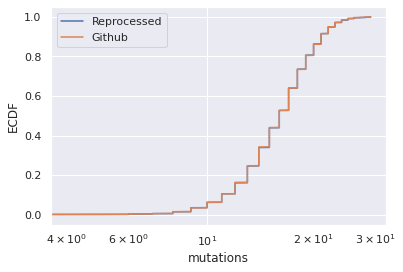

In [13]:
fig, ax = plt.subplots()
ax.plot(np.sort(df_rspA_new['nmut']), np.linspace(1/len(df_rspA_new), 1, num=len(df_rspA_new)), label="Reprocessed")
ax.plot(np.sort(df_git_map.nmut), np.linspace(1/len(df_git_map), 1, num=len(df_git_map)), label="Github")
#ax.plot(np.sort(df_rspA_new['ct'])/2, np.linspace(1/len(df_rspA_new), 1, num=len(df_rspA_new)), label="Reprocessed, rescaled counts")

ax.set_xlabel("mutations")
ax.set_ylabel("ECDF")
ax.set_xscale("log")
ax.legend();

Apparently for the distribution of counts, there seems to be a simple rescaling factor that makes them look pretty similar.

In [14]:
# Filter out low reads in github data
df_git_map = df_git_map.loc[df_git_map.ct > 1, :]

# Merge the datasets
df_compare_map = df_rspA_new.merge(df_git_map, on="tag", suffixes=("_new", "_git"), how='outer')

# Replace NaNs with zeros
df_compare_map['ct_git'].fillna(0, inplace=True)
df_compare_map['ct_new'].fillna(0, inplace=True)

display(df_compare_map.head())
print("Number of rows: {}".format(len(df_compare_map)))

,tag,seq_new,ct_new,name,nmut_new,seq_git,ct_git,gene,nmut_git
0,CCCACGCTACTTAAGTCCGG,GACAAGAGGTATTCTATTTCATCTTTTGTCAACCATTCACAGCGCA...,199.0,rspA,15.0,NaN,0.0,NaN,NaN
1,GCCTGAGTTATTAGTTTTGG,GACAAAAGGTATTGTATTTCATGTTTTGTCAACCATTCTCAGCGCA...,199.0,rspA,18.0,NaN,0.0,NaN,NaN
2,GTGTCCCATAGCATCGCCGT,GACAAAAGGTATGCTATTGCATCTTTTGTCACCCATTCACAGCGCA...,196.0,rspA,19.0,NaN,0.0,NaN,NaN
3,CTTATTATGTAGAATAGCGA,GACAAAAGGGATTCTATTTCATCTGTTGTCAACCATTCTCAGCGCA...,195.0,rspA,15.0,NaN,0.0,NaN,NaN
4,AGACGTTTTTGCGTACATCC,GACAATATGTATTCTACTTCATCTTTCCGCAACCATTCACAGCGCA...,192.0,rspA,17.0,NaN,0.0,NaN,NaN


Number of rows: 24721


Text(0.5, 0, 'Counts from Github')

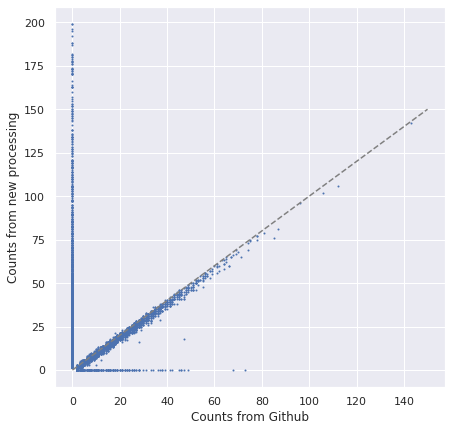

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot([0, 150], [0, 150], "--", color="grey")
ax.scatter(df_compare_map.ct_git, df_compare_map.ct_new, s=1)
ax.set_ylabel("Counts from new processing")
ax.set_xlabel("Counts from Github")

We can find counts that are identified in one of the two datasets (data points on either x or y axis), but counts that are found in both have a significant correlation, which I think is a good sign here.

In [16]:
print("Number of pairs in old processing but not in new: {}".format(len(df_compare_map.loc[df_compare_map.ct_new == 0, :])))
print("Number of pairs in new processing but not in old: {}".format(len(df_compare_map.loc[df_compare_map.ct_git == 0, :])))
print("Number of pairs in both: {}".format(len(df_compare_map.loc[(df_compare_map.ct_git > 0) & (df_compare_map.ct_new > 0), :])))

Number of pairs in old processing but not in new: 470
Number of pairs in new processing but not in old: 13008
Number of pairs in both: 11243


For each identified barcode the promoter sequence is the same between the two datasets.

## Comparing gDNA and cDNA counts

### rspA

### LB

In [17]:
# Custom analysis
df_new_LB_DNA = pd.read_csv(
    "../../../data/LB_heatshock_bc_by_gc/LB_DNA_113_identified.txt", 
    delim_whitespace=True, 
    names=["ct", "barcode", "seq", "mapping_count", "name", "nmut"]
)

df_new_LB_RNA = pd.read_csv(
    "../../../data/LB_heatshock_bc_by_gc/LB_RNA_113_identified.txt", 
    delim_whitespace=True, 
    names=["ct", "barcode", "seq", "mapping_count", "name", "nmut"]
)

df_new_LB = df_new_LB_DNA.merge(df_new_LB_RNA, on=['barcode', 'seq', 'mapping_count', 'name', 'nmut'], how='outer', suffixes=('_0', '_1'))
df_new_LB.fillna(0, inplace=True)
df_new_LB = df_new_LB.loc[df_new_LB['ct_0'] < 1000, :]
df_new_LB = df_new_LB.loc[df_new_LB['ct_1'] < 1000, :]
df_new_LB = df_new_LB.loc[df_new_LB['nmut'] < 30, :]
df_new_LB = df_new_LB.loc[df_new_LB['mapping_count'] > 1, :]
df_new_LB = df_new_LB.loc[df_new_LB["name"] == "rspA", :]
df_new_LB.reset_index(inplace=True, drop=True)

# Fix type
df_new_LB["ct_1"] = [int(x) for x in df_new_LB.ct_1]
df_new_LB["ct_0"] = [int(x) for x in df_new_LB.ct_0]


df_new_LB

,ct_0,barcode,seq,mapping_count,name,nmut,ct_1
0,318,AGTGAATGACACTCTAGTAG,GACCAAAGGGATTCTATTTCATCTGTTGTCAACCATTCACAGTGCA...,47,rspA,17,452
1,215,CGTCTTTGTGTTTGTACGTT,GACAAAAGGTAATCTTTTTCATCTTTTGTCAACGATTCACAGCGCA...,84,rspA,14,36
2,197,AGCTGTCTGGGCCGATTTAG,GACAAAAGGTATTCTATATCATCTTTTGTCAACAATTAACAGCGCA...,31,rspA,9,235
3,196,TTTGGCGACTGTTCGACTGC,GACACAAGGTCTTCTATTTCGGCTTTTGTCAACCATTCACAGCGCA...,797,rspA,17,23
4,165,ATTGATCACTTCGGTTGGTC,GATAAAAGGTATTCTATTTCATCTTTTGTCAACCATTCACAGCGCA...,252,rspA,8,136
...,...,...,...,...,...,...,...
18981,0,AGGGACATACAAAATGCGCA,GACAAAAGGTATTCTCTTTCATCTTTTGTCAACCATTCACAGCGCA...,17,rspA,13,1
18982,0,AGGACCGAGTAGACTAGTAA,GACAAAAGGTATGCTTGTTCCTCTTTTGTCAACCAGTCACAGAGCA...,2,rspA,15,1
18983,0,AGCCTTGCATTTCACGACCT,GACAAAAGGCATTCTATTTCATCTTTTGTCAACAATTCACAGCGAA...,12,rspA,12,1
18984,0,ACGAACACGGGGCTAAATTG,GACTAAGTGTATTCTGTTTCATATTTTGGCAACCATTCACAGTGCA...,10,rspA,22,1


In [18]:
p = np.sum([1 == np.sum([x == y for x in df_rspA_new.tag]) for y in df_new_LB.barcode]) / len(df_new_LB.barcode)
print("{}% of new barcodes found in new mapping.".format(p * 100))

p = np.sum([1 == np.sum([x == y for x in df_git_map.tag]) for y in df_new_LB.barcode]) / len(df_new_LB.barcode)
print("{}% of new barcodes found in old mapping.".format(p * 100))

99.85252291161909% of new barcodes found in new mapping.
40.724744548614765% of new barcodes found in old mapping.


In [19]:
# Github
df_git_LB = pd.read_csv("data_files/rspA_LB_regseq", delim_whitespace=True)

# split sequence into barcode and promoter
df_git_LB["barcode"] = [x[-20:] for x in df_git_LB.seq]
df_git_LB.seq = [x[:160] for x in df_git_LB.seq]
df_git_LB

,ct,ct_0,ct_1,seq,barcode
0,13.0,13.0,0.0,AACAAAAAGTATGCTATTTCATCTTTTGTCAACTATTCACAGCCCA...,GTAGAGAACTGGTTTGTCAA
1,3.0,3.0,0.0,AACAAAAAGTATTCTACTTCGTCTTTTGTCAACCATTCACAGCGCA...,ACAGTCTTTCCAAATCCGCG
2,1.0,1.0,0.0,AACAAAAAGTATTCTACTTCGTCTTTTGTCAACCATTCACAGCGCA...,AAATTTCGGATGCCGAGGTG
3,2.0,2.0,0.0,AACAAAAAGTATTCTACTTCGTCTTTTGTCAACCATTCACAGCGCA...,CAGGTGTGTGCTTGGCACAG
4,1.0,1.0,0.0,AACAAAAAGTATTCTACTTCGTCTTTTGTCAACCATTCACAGCGCA...,GATGGGCGTCCTCAGCCATG
...,...,...,...,...,...
9871,1.0,1.0,0.0,TATTAAAGGTATGCTATTTCATCTTTTCTCAACCACTCGCAGCGCA...,TTCTTCGTTACTTCTACTGT
9872,1.0,1.0,0.0,TCCAAAAGGTATTCTATTCCATCTTTTGTCAACCATTCACGGCGCA...,AGTTAATGACACTCTCTTAG
9873,7.0,0.0,7.0,TCCAAACGGTATTCTATTTGATCTTTTGTCAACCATTCACAGCTCA...,AATTTGTGAACCGAGCTTAC
9874,4.0,3.0,1.0,TGCACAAGGTATACTATTTCACCTTTCGTGTACCATTCACAGCGCA...,CTTCGCTTTGGGCTAACTCG


In [20]:
p = np.sum([np.sum([x == y for x in df_git_map.tag]) for y in df_git_LB.barcode]) / len(df_git_LB.barcode)
print("{}% of old barcodes found in old mapping.".format(p * 100))

p = np.sum([np.sum([x == y for x in df_rspA_new.tag]) for y in df_git_LB.barcode]) / len(df_git_LB.barcode)
print("{}% of old barcodes found in new mapping.".format(p * 100))

90.88699878493317% of old barcodes found in old mapping.
98.43053867962738% of old barcodes found in new mapping.


In [21]:
# Merge on barcodes
df_compare_LB = df_new_LB.merge(df_git_LB, on=["barcode", "seq"], suffixes=("_new", "_git"), how='outer')
#df_compare_LB['ct_git'].fillna(0, inplace=True)
#df_compare_LB['ct_new'].fillna(0, inplace=True)
df_compare_LB['ct_0_git'].fillna(0, inplace=True)
df_compare_LB['ct_1_git'].fillna(0, inplace=True)
df_compare_LB['ct_0_new'].fillna(0, inplace=True)
df_compare_LB['ct_1_new'].fillna(0, inplace=True)
df_compare_LB[["barcode", "ct_0_new", "ct_0_git", "ct_1_new", "ct_1_git"]].sort_values("ct_1_new", ascending=False).head(50)

,barcode,ct_0_new,ct_0_git,ct_1_new,ct_1_git
11563,AACGCTGGAGACTTTAATAC,4.0,0.0,456.0,0.0
0,AGTGAATGACACTCTAGTAG,318.0,0.0,452.0,0.0
707,CCCTTCAGTCTAGAATGTAG,25.0,26.0,410.0,418.0
13,AAATAAATTGAGCACCCACA,114.0,0.0,383.0,0.0
2673,GTGCGTCTATATTATGTCTG,13.0,0.0,299.0,0.0
53,CGTGAGACACGAGTGGGGTG,69.0,0.0,296.0,0.0
1257,GCGACGGAATTCGTTGAAAC,19.0,0.0,289.0,0.0
1177,AGATTTGAACGGCATACGTA,20.0,0.0,281.0,0.0
1323,AGACCGGTTGGTCCCGAAAT,19.0,0.0,272.0,0.0
2646,TACGCTTCGATCCACACTGT,13.0,0.0,253.0,0.0


In [22]:
#print("Total counts in new processing:", np.sum(df_compare_LB.ct_new))
#print("Total counts in old processing:", np.sum(df_compare_LB.ct_git))
#print()
print("RNA counts in new processing:", np.sum(df_compare_LB.ct_1_new))
print("RNA counts in old processing:", np.sum(df_compare_LB.ct_1_git))
print()
print("DNA counts in new processing:", np.sum(df_compare_LB.ct_0_new))
print("DNA counts in old processing:", np.sum(df_compare_LB.ct_0_git))

RNA counts in new processing: 94277.0
RNA counts in old processing: 21190.0

DNA counts in new processing: 139413.0
DNA counts in old processing: 46457.0


Plot RNA and DNA counts for each 

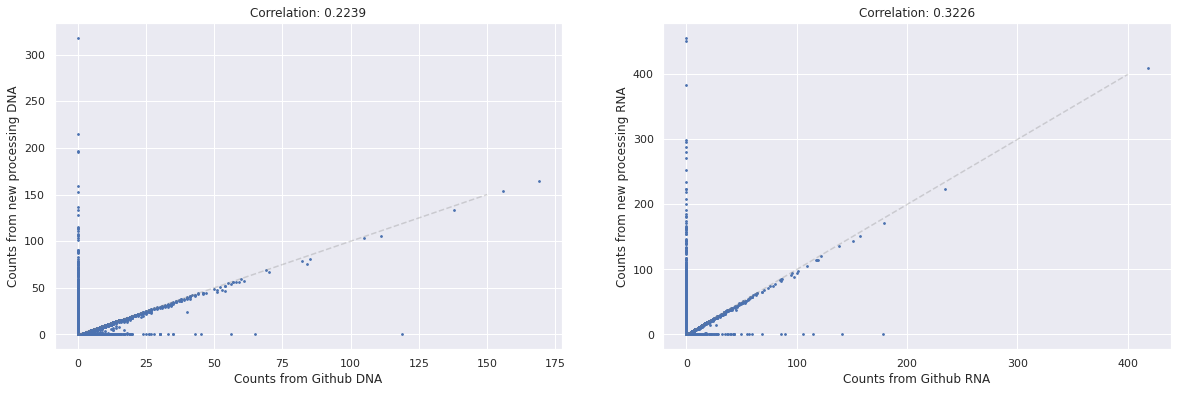

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].scatter(df_compare_LB.ct_0_git, df_compare_LB.ct_0_new, s=3)
ax[0].plot([0, 150], [0, 150], "--", color="grey", alpha=0.3)
ax[0].set_ylabel("Counts from new processing DNA")
ax[0].set_xlabel("Counts from Github DNA")
ax[0].set_title("Correlation: {:.4f}".format(np.corrcoef(df_compare_LB.ct_0_git, df_compare_LB.ct_0_new)[0, 1]))
#ax[0].set_ylim(0, 100)
#ax[0].set_xlim(0, 50)

ax[1].scatter(df_compare_LB.ct_1_git, df_compare_LB.ct_1_new, s=3)
ax[1].set_ylabel("Counts from new processing RNA")
ax[1].set_xlabel("Counts from Github RNA")
ax[1].set_title("Correlation: {:.4f}".format(np.corrcoef(df_compare_LB.ct_1_git, df_compare_LB.ct_1_new)[0, 1]));
ax[1].plot([0, 400], [0, 400], "--", color="grey", alpha=0.3);

In [24]:
# Custom analysis
df_new_heat = pd.read_csv("../../../data/LB_heatshock_bc_by_gc/heatshock_113_identified.txt", delim_whitespace=True)
df_new_heat = df_new_heat.loc[df_new_heat['ct_0'] < 1000, :]
df_new_heat = df_new_heat.loc[df_new_heat['ct_1'] < 1000, :]
# Filter out sequences for rspA
df_new_heat = df_new_heat.loc[df_new_heat["name"] == "rspA", :]
df_new_heat.reset_index(inplace=True, drop=True)

# Fix type
df_new_heat["ct_1"] = [int(x) for x in df_new_heat.ct_1]
df_new_heat["ct_0"] = [int(x) for x in df_new_heat.ct_0]
df_new_heat.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/LB_heatshock_bc_by_gc/heatshock_113_identified.txt'

In [ ]:
# add total number of counts
df_new_heat['ct'] = df_new_heat['ct_0'] + df_new_heat['ct_1']

# reorganize dataset to be able to compare
df_new_heat = df_new_heat[['ct', 'ct_0','ct_1', 'promoter', 'barcode']]
df_new_heat.rename(columns={"promoter":"seq"}, inplace=True)
df_new_heat.head()

In [ ]:
p = np.sum([1 == np.sum([x == y for x in df_rspA_new.tag]) for y in df_new_heat.barcode]) / len(df_new_heat.barcode)
print("{}% of new barcodes found in new mapping.".format(p * 100))

p = np.sum([1 == np.sum([x == y for x in df_git_map.tag]) for y in df_new_heat.barcode]) / len(df_new_heat.barcode)
print("{}% of new barcodes found in old mapping.".format(p * 100))

In [ ]:
# Github
df_git_heat = pd.read_csv("data_files/rspA_heatshock_regseq", delim_whitespace=True)

# split sequence into barcode and promoter
df_git_heat["barcode"] = [x[-20:] for x in df_git_heat.seq]
df_git_heat.seq = [x[:160] for x in df_git_heat.seq]
df_git_heat.head()

In [ ]:
p = np.sum([np.sum([x == y for x in df_git_map.tag]) for y in df_git_heat.barcode]) / len(df_git_heat.barcode)
print("{}% of old barcodes found in old mapping.".format(p * 100))

p = np.sum([np.sum([x == y for x in df_rspA_new.tag]) for y in df_git_heat.barcode]) / len(df_git_heat.barcode)
print("{}% of old barcodes found in new mapping.".format(p * 100))

In [ ]:
# Merge on barcodes
df_compare_heat = df_new_heat.merge(df_git_heat, on="barcode", suffixes=("_new", "_git"), how='outer')
df_compare_heat['ct_git'].fillna(0, inplace=True)
df_compare_heat['ct_new'].fillna(0, inplace=True)
df_compare_heat['ct_0_git'].fillna(0, inplace=True)
df_compare_heat['ct_1_git'].fillna(0, inplace=True)
df_compare_heat['ct_0_new'].fillna(0, inplace=True)
df_compare_heat['ct_1_new'].fillna(0, inplace=True)
df_compare_heat.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].scatter(df_compare_heat.ct_0_git, df_compare_heat.ct_0_new)
ax[0].set_ylabel("Counts from new processing DNA")
ax[0].set_xlabel("Counts from Github DNA")
#ax[0].set_title("Correlation: {:.4f}".format(np.corrcoef(df_compare.ct_0_git, df_compare.ct_0_new)[0, 1]))
#ax[0].set_ylim(0, 100)
#ax[0].set_xlim(0, 50)

ax[1].scatter(df_compare_heat.ct_1_git, df_compare_heat.ct_1_new)
ax[1].set_ylabel("Counts from new processing RNA")
ax[1].set_xlabel("Counts from Github RNA")
#ax[1].set_title("Correlation: {:.4f}".format(np.corrcoef(df_compare.ct_1_git, df_compare.ct_1_new)[0, 1]));

In [ ]:
_df = df_compare_LB.merge(df_compare_heat, on="barcode", how='inner', suffixes=['_LB', '_heat'])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].scatter(_df.ct_0_new_heat, _df.ct_0_new_LB)
ax[0].set_ylabel("DNA counts heatshock")
ax[0].set_xlabel("DNA counts LB")
ax[0].set_title("New processing")
#ax[0].set_ylim(0, 100)
#ax[0].set_xlim(0, 50)

ax[1].scatter(_df.ct_0_git_heat, _df.ct_0_git_LB)
ax[1].set_ylabel("DNA counts heatshock")
ax[1].set_xlabel("DNA counts LB")
ax[1].set_title("Github data");

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].scatter(_df.ct_1_new_heat, _df.ct_1_new_LB)
ax[0].set_ylabel("RNA counts heatshock")
ax[0].set_xlabel("RNA counts LB")
ax[0].set_title("New processing")
#ax[0].set_ylim(0, 100)
#ax[0].set_xlim(0, 50)

ax[1].scatter(_df.ct_1_git_heat, _df.ct_1_git_LB)
ax[1].set_ylabel("RNA counts heatshock")
ax[1].set_xlabel("RNA counts LB")
ax[1].set_title("Github data");

## Footprints

### File from Github

In [25]:
df_git = pd.read_csv("analysis_files/rspA_mcmc_mpathic_regseq_og.csv", index_col=0)
display(df_git.head())
mcmc_arr = df_git[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

,pos,val_A,val_C,val_G,val_T
0,0,0.032572,-0.009384,-0.003338,-0.019851
1,1,0.036256,-0.018605,-0.003830,-0.013822
2,2,-0.000873,-0.010692,0.017495,-0.005930
3,3,0.000824,0.009919,0.012924,-0.023667
4,4,-0.026387,0.005879,0.027203,-0.006695


Transform phenotype output to probabilities using exponential distribution.

In [26]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

Text(0.5, 1.0, 'rspA in LB')

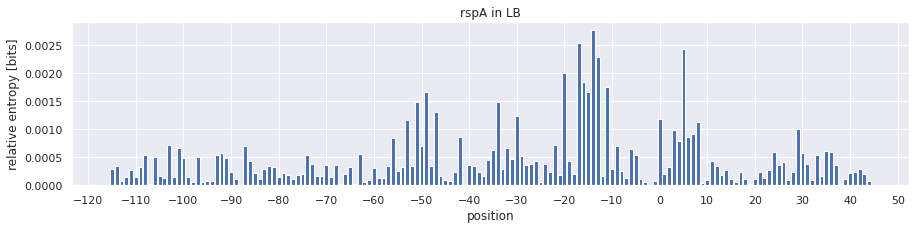

In [27]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

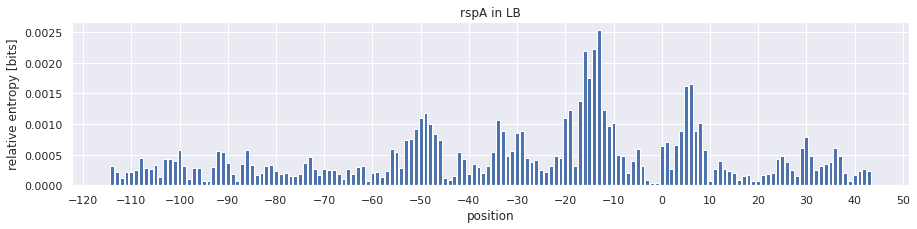

In [28]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')
fig.savefig("rspA_footprint_eLife_data.pdf")

### Reprocessed data

Run mpathic on dataframe.

In [34]:
df_mcmc = pd.read_csv("rspA_mcmc_mpathic_regseq_data2.csv", index_col=0)
df_mcmc.head()

,pos,val_A,val_C,val_G,val_T
0,0,-0.013082,-0.000039,0.009363,0.003758
1,1,-0.007964,-0.001064,-0.007385,0.016413
2,2,0.009383,0.010254,-0.012915,-0.006722
3,3,0.014384,-0.008926,-0.009157,0.003699
4,4,0.019598,-0.012876,-0.010417,0.003694


In [35]:
mcmc_arr = df_mcmc[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

Transform phenotype output to probabilities using exponential distribution.

In [36]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

Text(0.5, 1.0, 'rspA in LB')

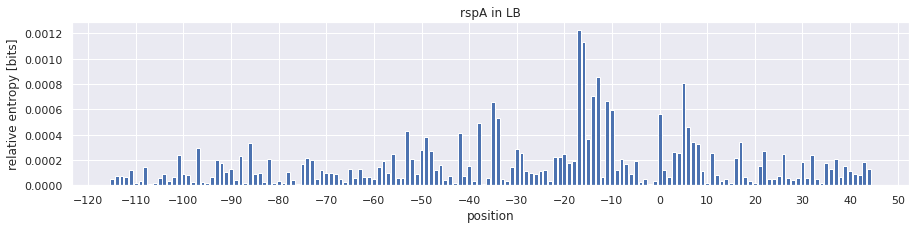

In [37]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

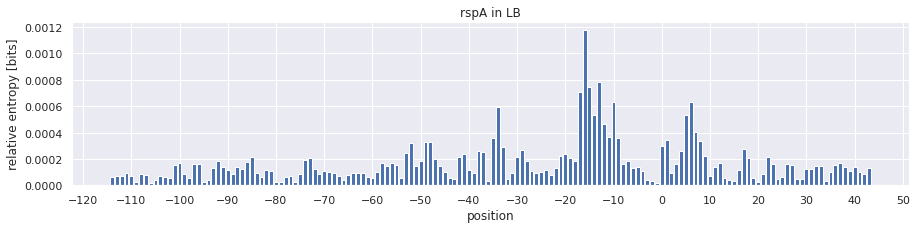

In [38]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')
fig.savefig("rspA_footprint_reprocessed.pdf")

In [ ]:
df_mcmc = pd.read_csv("analysis_files/rspA_mcmc_mpathic.csv", index_col=0)
df_mcmc.head()

In [ ]:
mcmc_arr = df_mcmc[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

Transform phenotype output to probabilities using exponential distribution.

In [ ]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')